<a href="https://colab.research.google.com/github/francoriottini/tareasdeherramientascomputacionales/blob/main/Tarea1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving tarea.csv to tarea (2).csv


In [ ]:
import pandas as pd
import io
unknown = pd.read_csv(io.StringIO(uploaded['tarea.csv'].decode('utf-8'))) #Subimos la base y la nombramos unknown

In [ ]:
print(unknown.head()) #Mostramos las primeras 5 filas

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [ ]:
print(unknown.head(3)) #Mostramos las primeras 3 filas

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31


In [ ]:
print(unknown.cut) #Imprimimos la columna 'cut'
#print(pd.DataFrame(unknown, columns = ['cut'])) #Alternativa como dataframe

0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: object


In [ ]:
#Creamos la serie "calidad - color"
#unknown.color
#unknown["color"]
calidadcolor = unknown[["cut", "color"]].apply("-".join, axis = 1)
print(calidadcolor)
#unknown["calidad-color"] = unknown[["cut", "color"]].apply("-".join, axis = 1) #También podemos agregarlo como nueva columna a la base
#print(unknown["calidad-color"]) #Refleja lo mismo que antes

0            Ideal-E
1          Premium-E
2             Good-E
3          Premium-I
4             Good-J
            ...     
53935        Ideal-D
53936         Good-D
53937    Very Good-D
53938      Premium-H
53939        Ideal-D
Length: 53940, dtype: object


In [ ]:
shape = unknown.shape
print(f"The shape of the db is: {shape}")

dtypes = unknown.dtypes
print(f"Types of each column are:")
print(dtypes)

The shape of the db is: (53940, 10)
Types of each column are:
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


In [ ]:
print(unknown.describe(include=['object']))

          cut  color clarity
count   53940  53940   53940
unique      5      7       8
top     Ideal      G     SI1
freq    21551  11292   13065


In [ ]:
print(f"La base original es: \n\n {unknown.head()}\n")
#unknown.head()
modifunknown = unknown.rename(columns = {"clarity": "claridad", "cut": "calidad"})
#modifunknown.head()
print(f"La base modificada es: \n\n {modifunknown.head()}")

La base original es: 

    carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

La base modificada es: 

    carat  calidad color claridad  depth  table  price     x     y     z
0   0.23    Ideal     E      SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E      SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E      VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I      VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J      SI2   63.3   58.0    335  4.34  4.35  2.75


In [ ]:
unknown2 = unknown.drop(unknown.columns[[1, 2]], axis=1)
print(unknown2)


       carat clarity  depth  table  price     x     y     z
0       0.23     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 8 columns]


In [ ]:
unknown2.drop([0, 1, 15, 200, 3000, 50000], inplace = True)
print(unknown2)

       carat clarity  depth  table  price     x     y     z
2       0.23     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31     SI2   63.3   58.0    335  4.34  4.35  2.75
5       0.24    VVS2   62.8   57.0    336  3.94   NaN  2.48
6       0.24    VVS1   62.3   57.0    336  3.95  3.98  2.47
...      ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53934 rows x 8 columns]


In [ ]:
unknown.cut.sort_values()
type(unknown.cut.sort_values())
print(unknown.cut.sort_values()) #Tomado así, "cut" es una LISTA

3850          Fair
51464         Fair
51466         Fair
10237         Fair
10760         Fair
           ...    
7402     Very Good
43101    Very Good
16893    Very Good
16898    Very Good
21164    Very Good
Name: cut, Length: 53940, dtype: object


In [ ]:
unknown.sort_values('carat', ascending = False)

,carat,cut,color,clarity,depth,table,price,x,y,z
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
27130,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
25999,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
...,...,...,...,...,...,...,...,...,...,...
31592,0.20,Premium,E,VS2,59.0,60.0,367,3.81,3.78,2.24
31591,0.20,Premium,E,VS2,59.8,62.0,367,3.79,3.77,2.26
31601,0.20,Premium,D,VS2,61.7,60.0,367,3.77,3.72,2.31
14,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27


In [ ]:
filtered_unknown = unknown[(unknown.x>5) & (unknown.y>5) & (unknown.z>5)]
print(filtered_unknown)

       carat        cut color clarity  depth  table  price     x      y      z
11778   1.83       Fair     J      I1   70.0   58.0   5083  7.34   7.28   5.12
13002   2.14       Fair     J      I1   69.4   57.0   5405  7.74   7.70   5.36
13118   2.15       Fair     J      I1   65.5   57.0   5430  8.01   7.95   5.23
13562   1.96       Fair     F      I1   66.6   60.0   5554  7.59   7.56   5.04
13757   2.22       Fair     J      I1   66.7   56.0   5607  8.04   8.02   5.36
...      ...        ...   ...     ...    ...    ...    ...   ...    ...    ...
27748   2.00  Very Good     G     SI1   63.5   56.0  18818  7.90   7.97   5.04
27749   2.29    Premium     I     VS2   60.8   60.0  18823  8.50   8.47   5.16
48410   0.51  Very Good     E     VS1   61.8   54.7   1970  5.12   5.15  31.80
49189   0.51      Ideal     E     VS1   61.8   55.0   2075  5.15  31.80   5.12
49905   0.50  Very Good     G    VVS1   63.7   58.0   2180  5.01   5.04   5.06

[1457 rows x 10 columns]


In [ ]:
#filtered_unknown = filtered_unknown(x for x in filtered_unknown.carat if x > "0.4")
#for x in filtered_unknown.carat:
#print(filtered_unknown)
#ESTE NO NOS SALIÓ, SIN EMBARGO SE PUEDE HACER ALTERNATIVAMENTE COMO
filtered_unknown = filtered_unknown[(filtered_unknown['carat']>0.4)] #No entendemos bien porque acá hay que "seleccionar la columna" y no se puede,
#como en el ejercicio anterior, usar el .carat
print(filtered_unknown)

       carat        cut color clarity  depth  table  price     x      y      z
11778   1.83       Fair     J      I1   70.0   58.0   5083  7.34   7.28   5.12
13002   2.14       Fair     J      I1   69.4   57.0   5405  7.74   7.70   5.36
13118   2.15       Fair     J      I1   65.5   57.0   5430  8.01   7.95   5.23
13562   1.96       Fair     F      I1   66.6   60.0   5554  7.59   7.56   5.04
13757   2.22       Fair     J      I1   66.7   56.0   5607  8.04   8.02   5.36
...      ...        ...   ...     ...    ...    ...    ...   ...    ...    ...
27748   2.00  Very Good     G     SI1   63.5   56.0  18818  7.90   7.97   5.04
27749   2.29    Premium     I     VS2   60.8   60.0  18823  8.50   8.47   5.16
48410   0.51  Very Good     E     VS1   61.8   54.7   1970  5.12   5.15  31.80
49189   0.51      Ideal     E     VS1   61.8   55.0   2075  5.15  31.80   5.12
49905   0.50  Very Good     G    VVS1   63.7   58.0   2180  5.01   5.04   5.06

[1457 rows x 10 columns]


In [ ]:
filtered_unknown = filtered_unknown[(filtered_unknown.cut == "Premium") | (filtered_unknown.cut == "Ideal")]
print(filtered_unknown)

       carat      cut color clarity  depth  table  price     x      y     z
15319   2.08  Premium     H      I1   61.7   57.0   6150  8.23   8.18  5.06
15905   2.15  Premium     H      I1   62.9   57.0   6357  8.25   8.20  5.18
16341   2.21  Premium     H      I1   62.2   58.0   6535  8.31   8.27  5.16
17859   2.00    Ideal     H      I1   62.5   57.0   7204  8.05   7.98  5.01
17897   2.30  Premium     G      I1   60.2   59.0   7226  8.71   8.56  5.19
...      ...      ...   ...     ...    ...    ...    ...   ...    ...   ...
27741   2.15    Ideal     G     SI2   62.6   54.0  18791  8.29   8.35  5.21
27744   2.29  Premium     I     SI1   61.8   59.0  18797  8.52   8.45  5.24
27746   2.07    Ideal     G     SI2   62.5   55.0  18804  8.20   8.13  5.11
27749   2.29  Premium     I     VS2   60.8   60.0  18823  8.50   8.47  5.16
49189   0.51    Ideal     E     VS1   61.8   55.0   2075  5.15  31.80  5.12

[892 rows x 10 columns]


In [ ]:
print(filtered_unknown.describe())

            carat       depth       table         price           x  \
count  892.000000  892.000000  892.000000    892.000000  892.000000   
mean     2.192253   61.828700   57.589686  15272.739910    8.333217   
std      0.232729    0.992308    1.828563   2468.900285    0.302966   
min      0.510000   58.200000   52.000000   2075.000000    5.150000   
25%      2.040000   61.400000   56.000000  13610.750000    8.140000   
50%      2.130000   62.000000   58.000000  15676.500000    8.270000   
75%      2.270000   62.500000   59.000000  17219.500000    8.450000   
max      4.010000   66.700000   62.000000  18823.000000   10.140000   

                y           z  
count  892.000000  892.000000  
mean     8.388722    5.148139  
std      1.887253    0.181206  
min      7.650000    5.010000  
25%      8.110000    5.040000  
50%      8.250000    5.100000  
75%      8.430000    5.200000  
max     58.900000    8.060000  


In [ ]:
print(filtered_unknown.mean())

carat        2.192253
depth       61.828700
table       57.589686
price    15272.739910
x            8.333217
y            8.388722
z            5.148139
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
print(filtered_unknown.groupby('cut').price.mean())

cut
Ideal      15495.588942
Premium    15077.981092
Name: price, dtype: float64


In [ ]:
print(filtered_unknown.groupby('cut').price.agg(['count', 'min', 'max']))

         count   min    max
cut                        
Ideal      416  2075  18804
Premium    476  6150  18823


In [ ]:
print(filtered_unknown.cut.unique()) #or
print(unknown.cut.unique())

['Premium' 'Ideal']
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']


In [ ]:
print(unknown.cut.value_counts())

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64


In [ ]:
#print(unknown.cut.count())
print(unknown.cut.value_counts()/unknown.cut.count()*100)


Ideal        39.953652
Premium      25.567297
Very Good    22.398962
Good          9.095291
Fair          2.984798
Name: cut, dtype: float64


In [ ]:
print(pd.crosstab(unknown.cut, unknown.color))

color         D     E     F     G     H     I    J
cut                                               
Fair        163   224   312   314   303   175  119
Good        662   933   909   871   702   522  307
Ideal      2834  3903  3826  4884  3115  2093  896
Premium    1603  2337  2331  2924  2360  1428  808
Very Good  1513  2400  2164  2299  1824  1204  678


cut
Fair         AxesSubplot(0.125,0.125;0.775x0.755)
Good         AxesSubplot(0.125,0.125;0.775x0.755)
Ideal        AxesSubplot(0.125,0.125;0.775x0.755)
Premium      AxesSubplot(0.125,0.125;0.775x0.755)
Very Good    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object


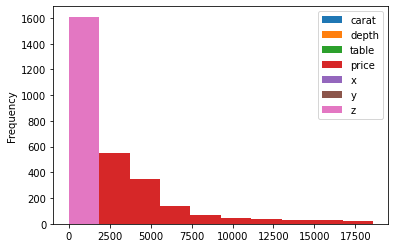

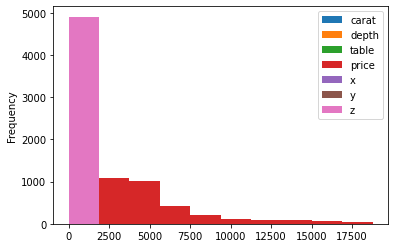

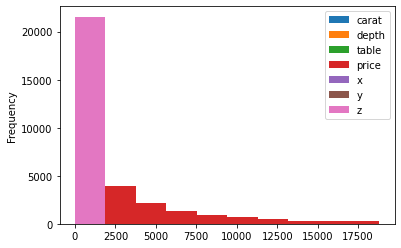

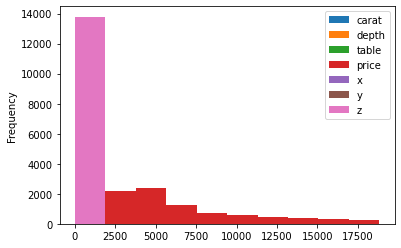

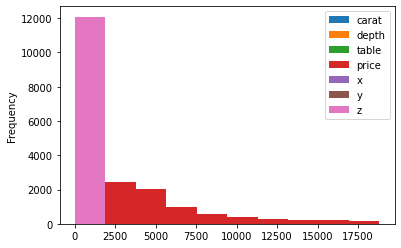

In [ ]:
print(unknown.groupby('cut').plot(kind='hist'))

AxesSubplot(0.125,0.125;0.775x0.755)


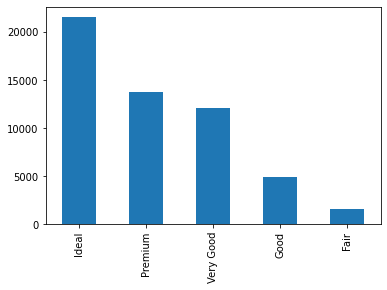

In [ ]:
print(unknown.cut.value_counts().plot(kind = 'bar'))

In [ ]:
print(unknown.isnull().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          1
z          0
dtype: int64


In [ ]:
unknown = unknown.dropna(how='any')
print(unknown) #se elimina solo una fila

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53939 rows x 10 columns]


In [ ]:
unknown = unknown.dropna(how='all')
print(unknown) #no se elimina ninguna fila

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53939 rows x 10 columns]


In [31]:
#unknown.loc[[0, 2, 5]] #No toma la función porque la fila eliminada ES la 5. Como hacer para que elimine la que está en el 5to lugar?
unknown.loc[[0, 2, 6]]

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


In [ ]:
unknown.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39
10,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73


In [ ]:
unknown.loc[0:2, ['color', 'price']]

,color,price
0,E,326
1,E,326
2,E,327


In [ ]:
unknown.loc[unknown.cut == 'Premium', ['color']]

,color
1,E
3,I
12,F
14,E
15,E
...,...
53928,E
53930,E
53931,F
53934,D


In [ ]:
unknown.sample(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
47882,0.60,Very Good,G,VS1,61.6,56.0,1912,5.40,5.44,3.34
11738,1.16,Premium,F,SI2,62.1,59.0,5072,6.71,6.76,4.18
31948,0.30,Premium,F,VS2,61.6,58.0,776,4.31,4.29,2.65
14552,1.00,Premium,D,SI1,59.6,57.0,5880,6.54,6.44,3.87
31188,0.32,Very Good,D,SI1,63.3,57.0,756,4.39,4.36,2.77


In [ ]:
unknown.sample(frac=0.75, replace = False, random_state=1) #Muestra sin remplazo (replace=false)

,carat,cut,color,clarity,depth,table,price,x,y,z
2715,0.33,Ideal,H,SI1,60.6,56.0,564,4.46,4.49,2.72
14654,1.50,Premium,G,I1,60.3,61.0,5914,7.39,7.34,4.44
51128,0.72,Ideal,I,VVS2,62.4,53.0,2340,5.75,5.78,3.60
48658,0.34,Good,H,VS2,63.1,56.0,537,4.41,4.46,2.80
14813,1.22,Very Good,I,VS1,61.6,60.0,5966,6.86,6.80,4.21
...,...,...,...,...,...,...,...,...,...,...
5792,1.23,Ideal,H,I1,61.9,61.0,3905,6.85,6.79,4.22
27599,2.08,Premium,I,VS2,58.9,61.0,18447,8.36,8.35,4.92
39037,0.37,Ideal,G,IF,61.2,56.0,1056,4.65,4.67,2.85
21462,1.52,Premium,I,VS1,61.1,58.0,9557,7.44,7.38,4.53


In [ ]:
print(unknown.duplicated().sum())

146
